In [1]:
!pip3 install pandas numpy matplotlib seaborn scikit-learn jupyter notebook



[notice] A new release of pip is available: 23.0.1 -> 26.0.1
[notice] To update, run: pip3 install --upgrade pip


In [2]:
!pip3 install seaborn


[notice] A new release of pip is available: 23.0.1 -> 26.0.1
[notice] To update, run: pip3 install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sb.set_palette("husl")

In [6]:
df = pd.read_csv('../data/raw_data/Maternal_data.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [7]:
df.shape

(1014, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [9]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [10]:
df.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(562)

In [14]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [15]:
df.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

In [16]:
df['RiskLevel'].value_counts()

RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64

In [17]:
df['RiskLevel'].value_counts(normalize=True)*100

RiskLevel
low risk     40.039448
mid risk     33.136095
high risk    26.824458
Name: proportion, dtype: float64

In [18]:
df.select_dtypes(include=[np.number])

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76
...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80
1010,55,120,90,18.0,98.0,60
1011,35,85,60,19.0,98.0,86
1012,43,120,90,18.0,98.0,70


In [22]:
df.corr(numeric_only = True)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.079798
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.023108
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.046151
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.142867
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.098771
HeartRate,0.079798,-0.023108,-0.046151,0.142867,0.098771,1.000000


In [25]:
df.groupby('RiskLevel').mean()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
RiskLevel,,,,,,
high risk,36.216912,124.194853,85.073529,12.122610,98.899265,76.742647
low risk,26.869458,105.866995,72.534483,7.220271,98.368966,72.770936
mid risk,28.363095,113.154762,74.232143,7.795744,98.833333,74.175595


In [26]:
df.groupby('RiskLevel').median()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
RiskLevel,,,,,,
high risk,35.0,130.0,90.0,11.0,98.0,77.0
low risk,22.0,120.0,75.0,7.5,98.0,70.0
mid risk,25.0,120.0,75.0,7.0,98.0,76.0


In [27]:
df.groupby('RiskLevel').count()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
RiskLevel,,,,,,
high risk,272,272,272,272,272,272
low risk,406,406,406,406,406,406
mid risk,336,336,336,336,336,336


In [28]:
df.min()

Age                   10
SystolicBP            70
DiastolicBP           49
BS                   6.0
BodyTemp            98.0
HeartRate              7
RiskLevel      high risk
dtype: object

In [29]:
df.max()

Age                  70
SystolicBP          160
DiastolicBP         100
BS                 19.0
BodyTemp          103.0
HeartRate            90
RiskLevel      mid risk
dtype: object

In [31]:
df.std

<bound method DataFrame.std of       Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0      25         130           80  15.0      98.0         86  high risk
1      35         140           90  13.0      98.0         70  high risk
2      29          90           70   8.0     100.0         80  high risk
3      30         140           85   7.0      98.0         70  high risk
4      35         120           60   6.1      98.0         76   low risk
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60  15.0      98.0         80  high risk
1010   55         120           90  18.0      98.0         60  high risk
1011   35          85           60  19.0      98.0         86  high risk
1012   43         120           90  18.0      98.0         70  high risk
1013   32         120           65   6.0     101.0         76   mid risk

[1014 rows x 7 columns]>

In [33]:
df.quantile([0.25 , 0.5 , 0.75], numeric_only = True)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0.25,19.0,100.0,65.0,6.9,98.0,70.0
0.50,26.0,120.0,80.0,7.5,98.0,76.0
0.75,39.0,120.0,90.0,8.0,98.0,80.0


In [40]:
from pathlib import Path
output_dir = Path('../output/visualizations')
output_dir.mkdir(parents=True , exist_ok=True)

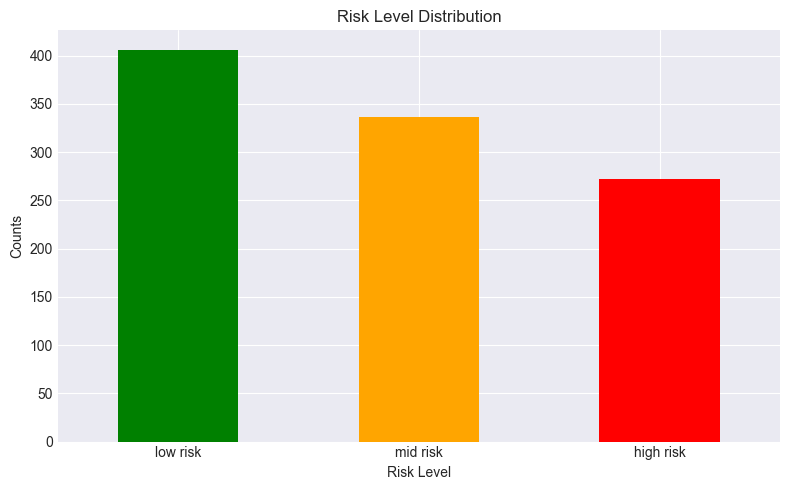

In [41]:
df['RiskLevel'].value_counts().plot(kind = 'bar' , color = ['green' , 'orange' , 'red'] , figsize = (8,5))

plt.title('Risk Level Distribution')
plt.xlabel('Risk Level')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(output_dir/'target_distribution.png' , dpi = 300)
plt.show()

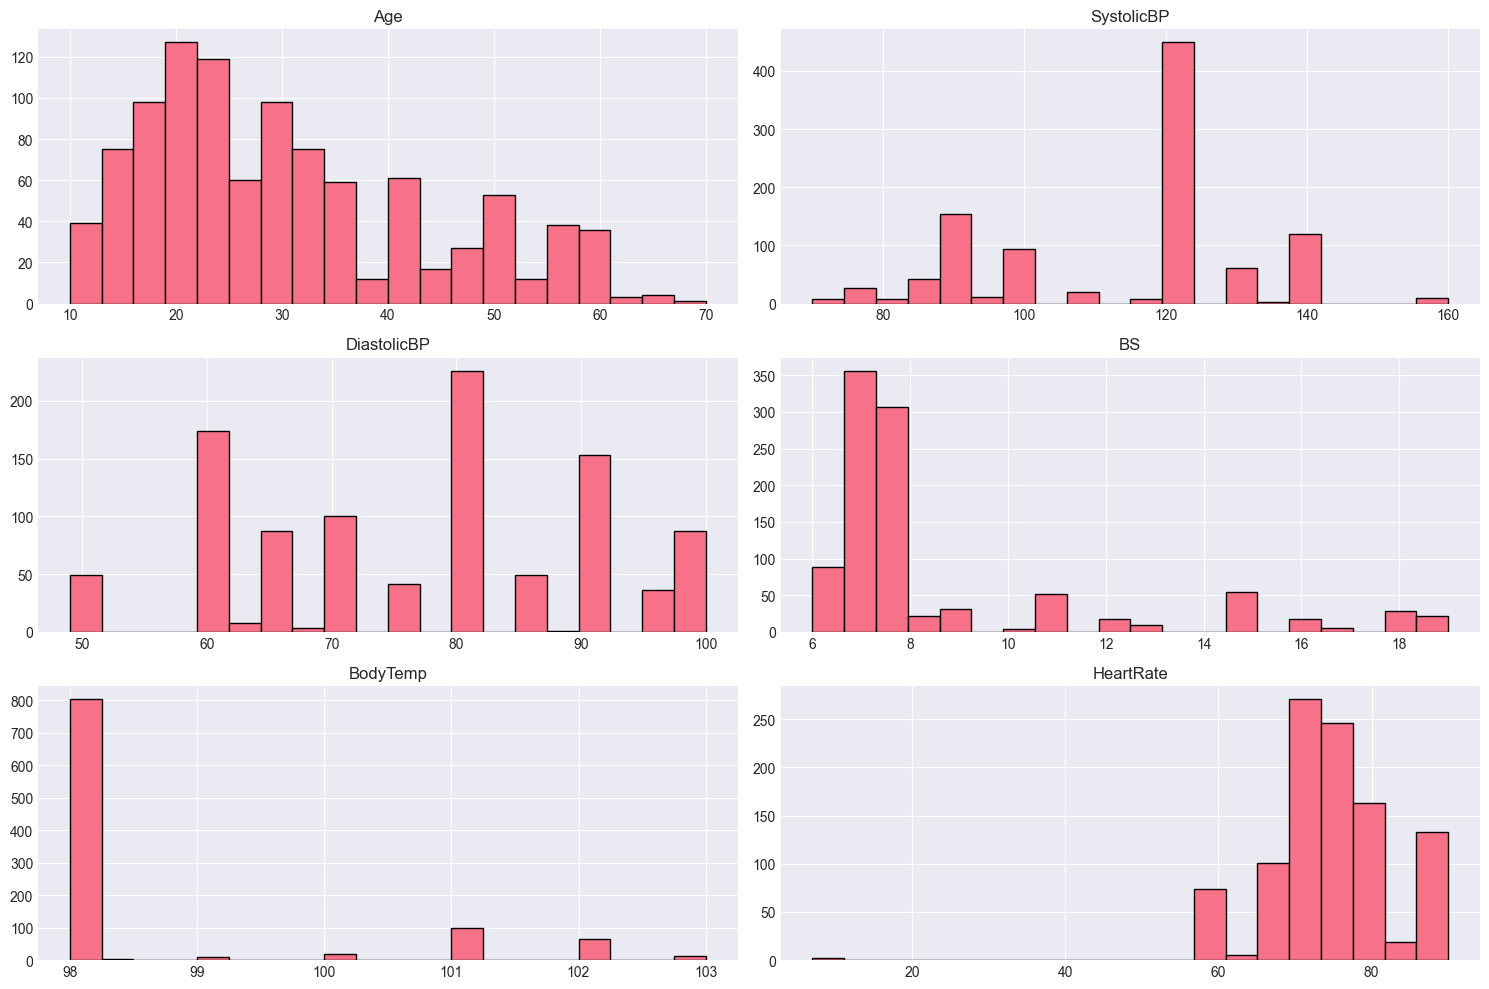

In [47]:
df.hist(figsize=(15,10), bins=20, edgecolor = 'black')
plt.tight_layout()
plt.savefig(output_dir/'feature_distributions.png', dpi = 300)
plt.show()

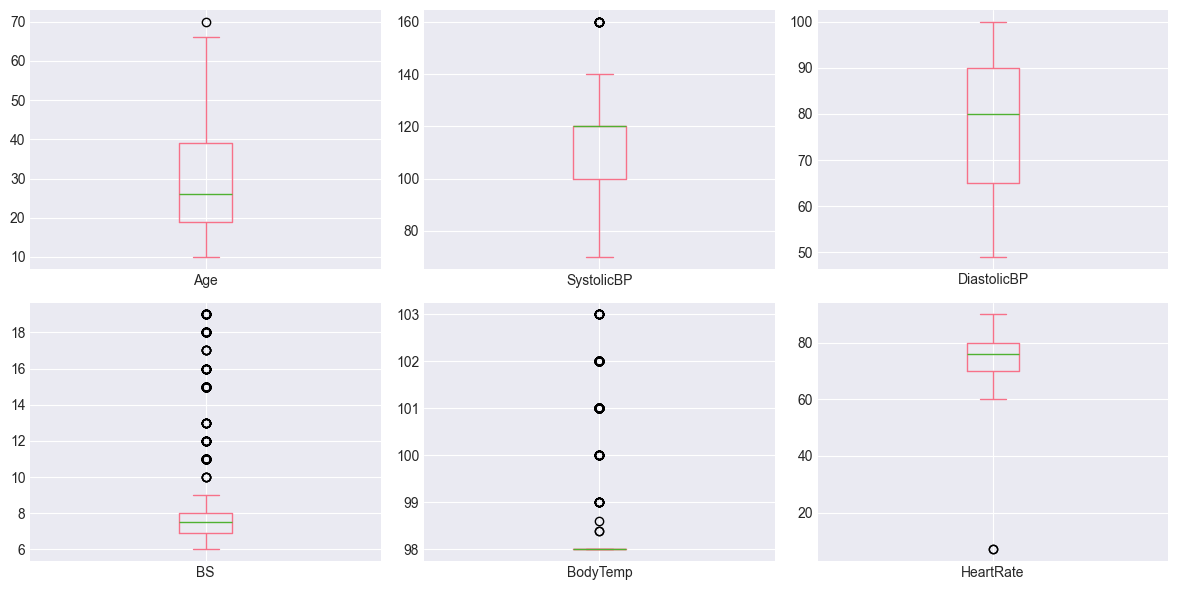

In [48]:
df.plot(kind = 'box', figsize = (12,6) , subplots = True , layout = (2,3))
plt.tight_layout()
plt.savefig(output_dir/'boxplots.png' , dpi = 300)
plt.show()

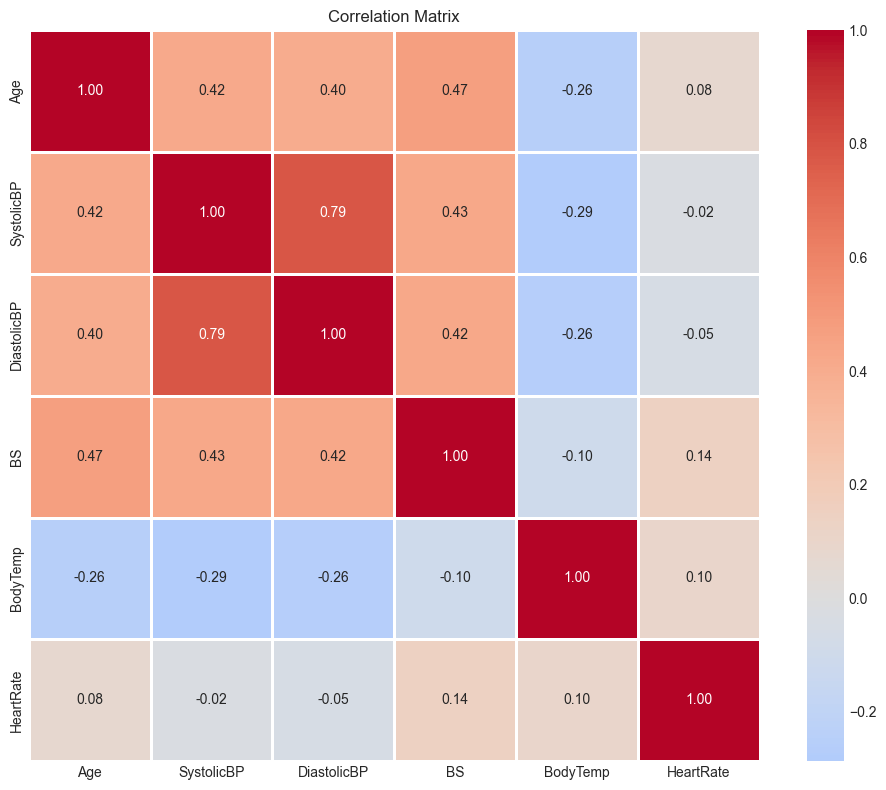

In [53]:
plt.figure(figsize = (10,8))
sb.heatmap(df.corr(numeric_only = True), annot = True, fmt = '.2f', cmap = 'coolwarm' , center = 0 , square = True , linewidths = 1)

plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig(output_dir/'Correlation_heatmap.png' , dpi = 300)
plt.show()

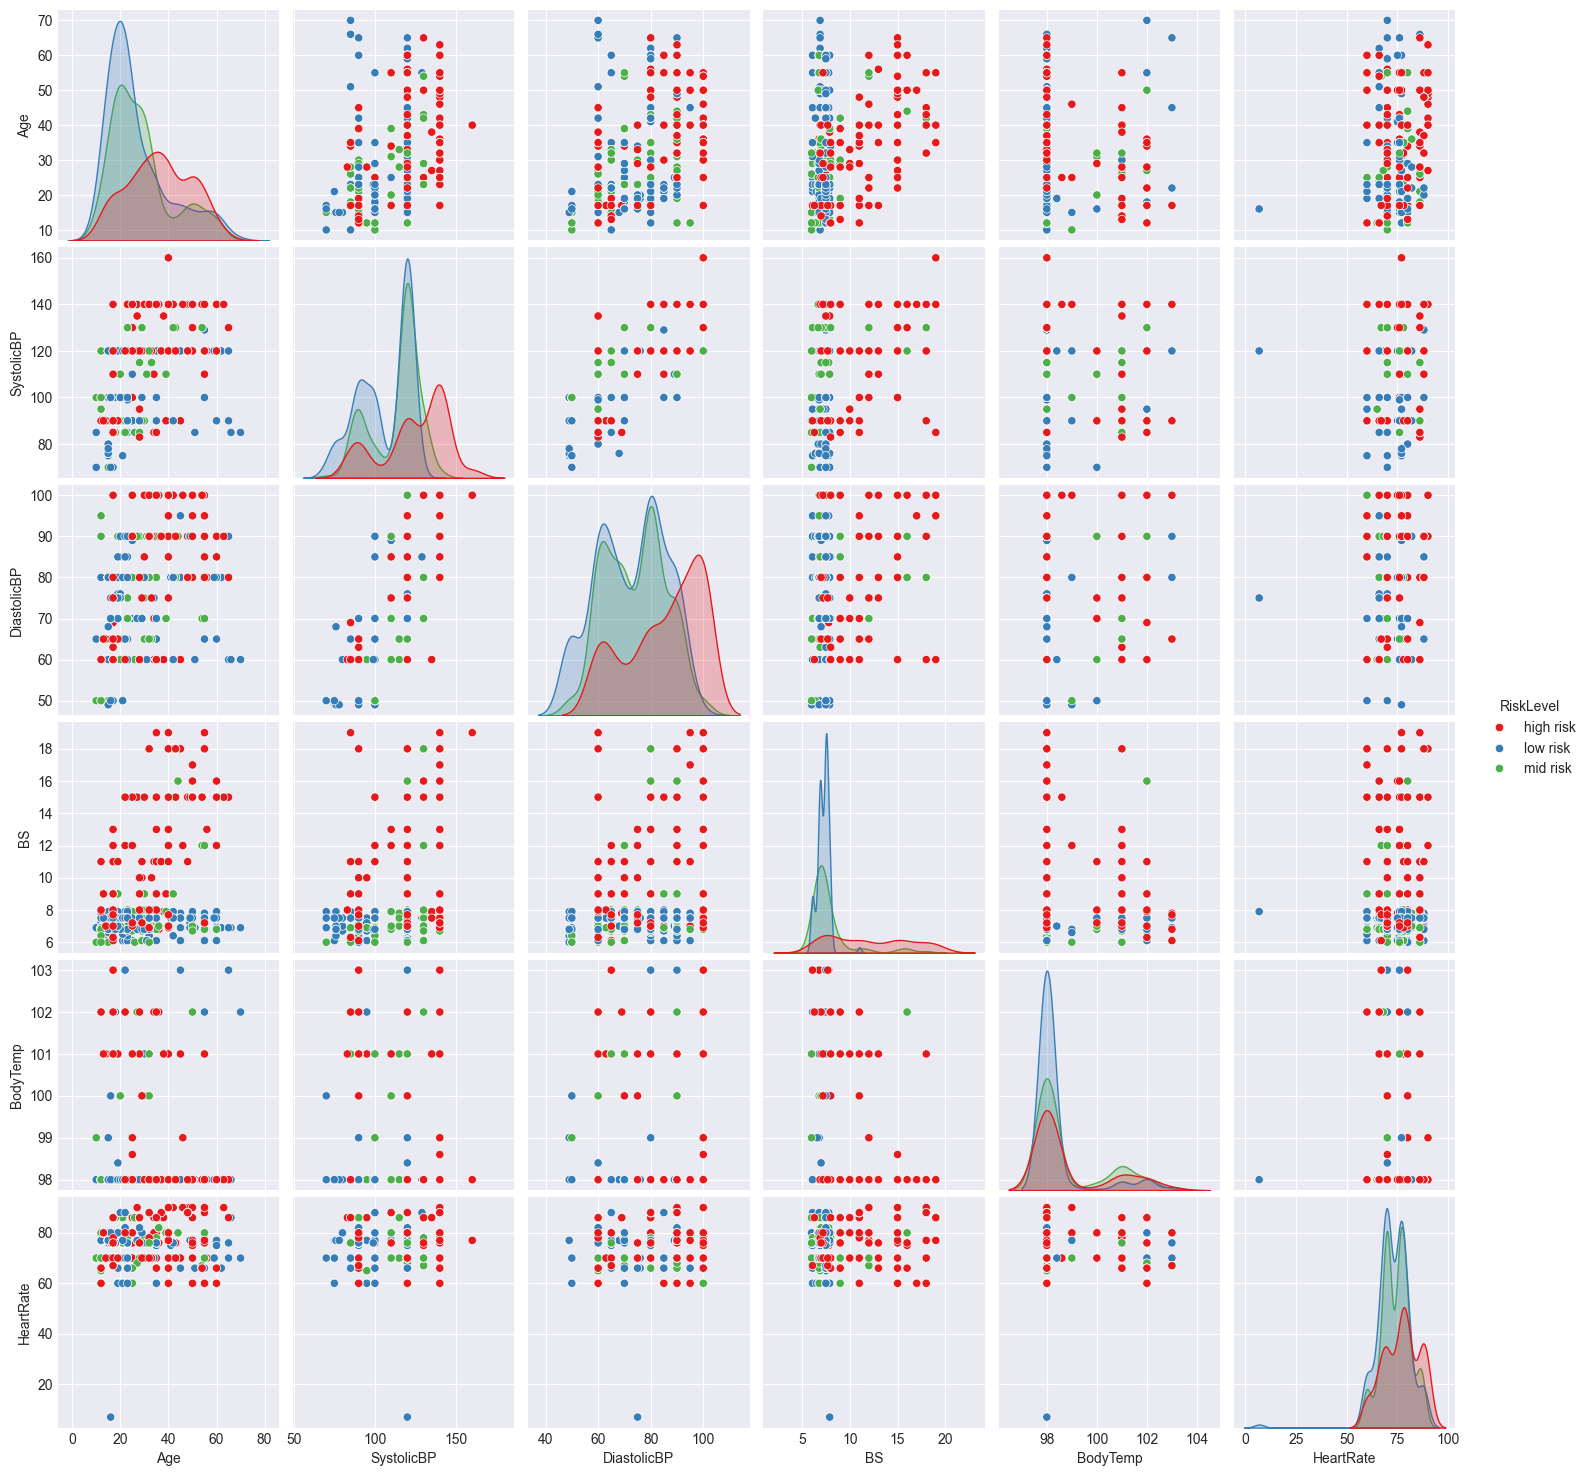

In [58]:
sb.pairplot(df, hue = 'RiskLevel' , palette = 'Set1')
plt.savefig(output_dir/'Pairplot.png' , dpi = 300)
plt.show()

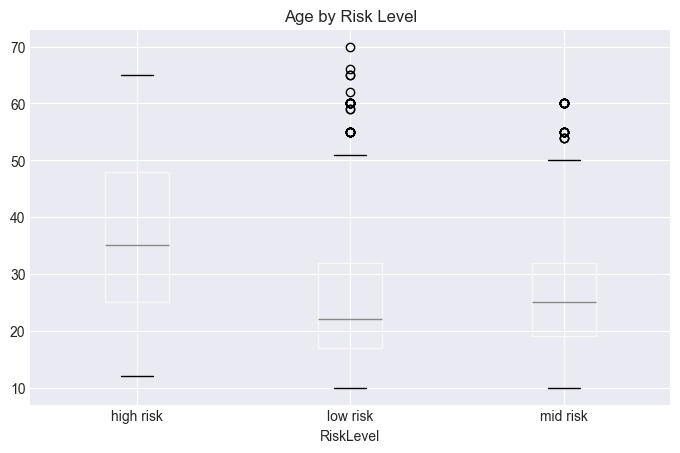

In [60]:
df.boxplot(column='Age' , by='RiskLevel' , figsize = (8,5))
plt.title('Age by Risk Level')
plt.suptitle('')
plt.show()

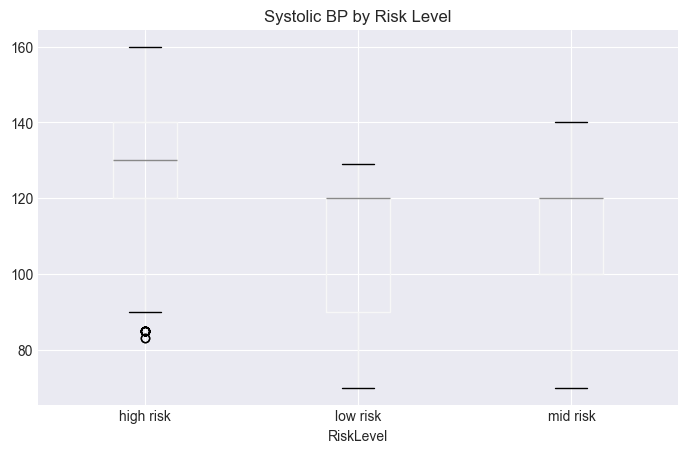

In [61]:
df.boxplot(column='SystolicBP' , by='RiskLevel' , figsize = (8,5))
plt.title('Systolic BP by Risk Level')
plt.suptitle('')
plt.show()

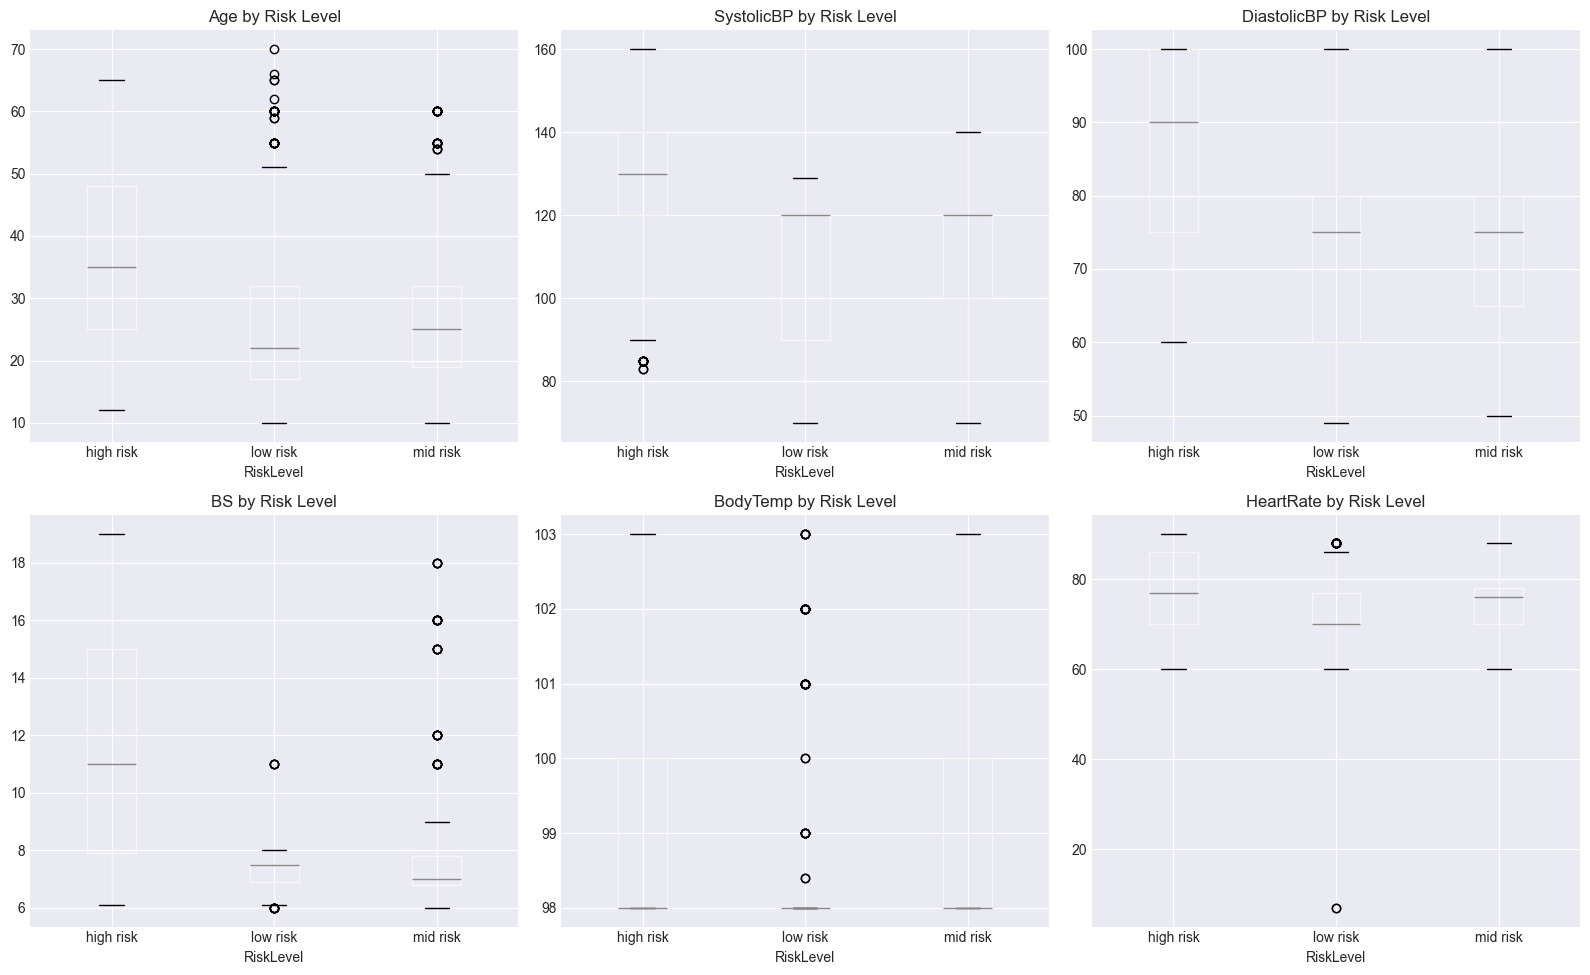

In [63]:
# For all numeric columns at once
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    if idx < len(axes):
        df.boxplot(column=col, by='RiskLevel', ax=axes[idx])
        axes[idx].set_title(f'{col} by Risk Level')

if len(numeric_cols) < len(axes):
    axes[-1].axis('off')
    
plt.suptitle('')
plt.tight_layout()
plt.savefig(output_dir/'boxplots_by_risk.png', dpi=300)
plt.show()

In [64]:
df.groupby('RiskLevel').agg(['mean' , 'median' , 'std' , 'min' , 'max'])

Age                            SystolicBP                    \
                mean median        std min max        mean median        std   
RiskLevel                                                                      
high risk  36.216912   35.0  13.032206  12  65  124.194853  130.0  20.227185   
low risk   26.869458   22.0  13.121661  10  70  105.866995  120.0  15.894002   
mid risk   28.363095   25.0  12.552660  10  60  113.154762  120.0  14.983170   

                   DiastolicBP                                    BS         \
          min  max        mean median        std min  max       mean median   
RiskLevel                                                                     
high risk  83  160   85.073529   90.0  14.112428  60  100  12.122610   11.0   
low risk   70  129   72.534483   75.0  13.054210  49  100   7.220271    7.5   
mid risk   70  140   74.232143   75.0  11.490151  50  100   7.795744    7.0   

                                 BodyTemp                                \
                std  min   max       mean median       std   min    max   
RiskLevel                                                                 
high risk  4.173525  6.1  19.0  98.899265   98.0  1.558692  98.0  103.0   
low risk   0.645596  6.0  11.0  98.368966   98.0  1.108941  98.0  103.0   
mid risk   2.285511  6.0  18.0  98.833333   98.0  1.433779  98.0  103.0   

           HeartRate                           
                mean median       std min max  
RiskLevel                                      
high risk  76.742647   77.0  8.697878  60  90  
low risk   72.770936   70.0  8.293341   7  88  
mid risk   74.175595   76.0  6.767490  60  88

In [65]:
df.nunique()

Age            50
SystolicBP     19
DiastolicBP    16
BS             29
BodyTemp        8
HeartRate      16
RiskLevel       3
dtype: int64

In [66]:
df.sample(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
832,60,120,80,7.5,98.0,75,mid risk
419,17,140,100,6.8,103.0,80,high risk
689,40,160,100,19.0,98.0,77,high risk
925,42,90,60,7.5,98.0,76,low risk
645,31,120,60,6.1,98.0,76,low risk
889,15,120,80,6.8,98.0,70,low risk
1001,60,120,85,15.0,98.0,60,high risk
646,23,120,85,8.0,98.0,70,low risk
519,30,140,100,15.0,98.0,70,high risk
404,60,90,65,6.8,98.0,77,mid risk


In [67]:
df[df['RiskLevel'] == 'high risk']

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
5,23,140,80,7.01,98.0,70,high risk
...,...,...,...,...,...,...,...
1008,48,120,80,11.00,98.0,88,high risk
1009,22,120,60,15.00,98.0,80,high risk
1010,55,120,90,18.00,98.0,60,high risk
1011,35,85,60,19.00,98.0,86,high risk


In [68]:
df[df['Age']>30]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1,35,140,90,13.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
7,35,85,60,11.0,102.0,86,high risk
8,32,120,90,6.9,98.0,70,mid risk
9,42,130,80,18.0,98.0,70,high risk
...,...,...,...,...,...,...,...
1008,48,120,80,11.0,98.0,88,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [69]:
df.sort_values('Age' , ascending = False).head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
338,70,85,60,6.9,102.0,70,low risk
326,66,85,60,6.9,98.0,86,low risk
322,65,90,60,6.9,98.0,70,low risk
435,65,130,80,15.0,98.0,86,high risk
339,65,120,90,6.9,103.0,76,low risk
114,63,140,90,15.0,98.0,90,high risk
502,63,140,90,15.0,98.0,90,high risk
313,62,120,80,6.9,98.0,66,low risk
415,60,140,90,12.0,98.0,77,high risk
280,60,120,80,7.7,98.0,75,low risk


In [70]:
summary = pd.DataFrame({
    'Total_Rows': [df.shape[0]],
    'Total_Columns': [df.shape[1]],
    'Missing_Values': [df.isnull().sum().sum()],
    'Duplicates': [df.duplicated().sum()]
})
summary

,Total_Rows,Total_Columns,Missing_Values,Duplicates
0,1014,7,0,562


In [71]:
for col in df.columns:
    display(df[col].value_counts())

Age
23    71
19    67
17    63
15    60
35    50
25    48
32    48
22    45
50    43
29    40
21    38
40    37
55    37
12    35
60    34
30    30
28    28
48    26
42    23
20    22
31    22
18    19
16    16
54    12
13    12
27     9
49     9
45     9
37     6
33     5
34     5
43     5
10     4
36     4
39     4
24     3
65     3
44     3
14     3
26     3
63     2
38     2
59     2
62     1
51     1
66     1
56     1
70     1
41     1
46     1
Name: count, dtype: int64

SystolicBP
120    449
90     154
140    120
100     92
130     60
85      43
110     19
76      16
95      12
160     10
75       8
115      8
70       7
80       5
135      3
78       3
83       2
99       2
129      1
Name: count, dtype: int64

DiastolicBP
80     226
60     174
90     153
70     100
100     87
65      87
85      49
75      38
95      36
49      25
50      24
63       8
76       3
68       2
89       1
69       1
Name: count, dtype: int64

BS
7.50     176
6.90     113
6.80      88
7.00      79
7.90      60
15.00     54
6.10      53
11.00     52
7.80      45
6.70      33
9.00      31
18.00     29
7.70      24
19.00     22
8.00      22
6.00      21
7.20      20
12.00     18
16.00     17
7.01      15
6.40      10
13.00      9
7.10       8
17.00      5
10.00      4
6.30       2
6.60       2
6.50       1
7.60       1
Name: count, dtype: int64

BodyTemp
98.0     804
101.0     98
102.0     66
100.0     20
103.0     13
99.0      10
98.4       2
98.6       1
Name: count, dtype: int64

HeartRate
70    271
76    131
80    117
77     96
66     87
60     74
88     59
86     55
78     46
90     19
82     19
75     19
67     12
65      5
68      2
7       2
Name: count, dtype: int64

RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64

In [73]:
# Save for next notebook
df.to_csv('../data/raw_data/maternal_health_clean.csv', index=False)